In [ ]:
#
import tensorflow as tf
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras import models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # uploading the training data not-normalized :

X_train_image = np.load("/content/drive/MyDrive/new_rakuten/X_train_image.npy")
X_test_image = np.load('/content/drive/MyDrive/new_rakuten/X_test_image.npy')
y_train = np.load("/content/drive/MyDrive/new_rakuten/y_train.npy")
y_test = np.load("/content/drive/MyDrive/new_rakuten/y_test.npy")

In [ ]:
# import the text dataset :
X_train_text = np.load('/content/drive/MyDrive/new_rakuten/X_train_text.npy')
X_test_text = np.load('/content/drive/MyDrive/new_rakuten/X_test_text.npy')

In [ ]:
X_train_text.shape, X_test_text.shape

((67932, 100), (16984, 100))

In [ ]:
X_train_image.shape, X_test_image.shape, y_train.shape, y_test.shape

((67932, 100, 100, 3), (16984, 100, 100, 3), (67932,), (16984,))

In [ ]:
# upload classifiers:

text_classifier = load_model('/content/drive/MyDrive/new_rakuten/best_word2vec_nn_model.h5')
image_classifier = load_model('/content/drive/MyDrive/new_rakuten/best_image_vgg_model_2.0.h5')

In [ ]:
############################################################################

In [ ]:


max_length = 100

# Define input layers for text and image data
text_input = Input(shape=(max_length,), dtype=tf.int32, name="text_input")
image_input = Input(shape=(100, 100, 3), dtype=tf.float32, name="image_input")

# Define the architecture for the text tower using the text classifier :
text_tower = Model(inputs=text_classifier.input, outputs=text_classifier.layers[-2].output)(text_input)

# Define the architecture for the image tower using the  image classifier :
image_tower = Model(inputs=image_classifier.input, outputs=image_classifier.layers[-2].output)(image_input)

# Concatenate the  text and image towers :
concatenated_features = concatenate([text_tower, image_tower])

# Add fusion layers :
fusion_dense = Dense(256, activation='relu')(concatenated_features)
fusion_dropout = Dropout(0.5)(fusion_dense)
fusion_dense_2 = Dense(128, activation='relu')(fusion_dropout)
fusion_dropout_2 = Dropout(0.5)(fusion_dense_2)


nClasses = 27
fusion_output = Dense(nClasses, activation='softmax')(fusion_dropout_2)

# Create the fusion model
fusion_model = Model(inputs=[text_input, image_input], outputs=fusion_output)

# Compile the fusion model
fusion_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




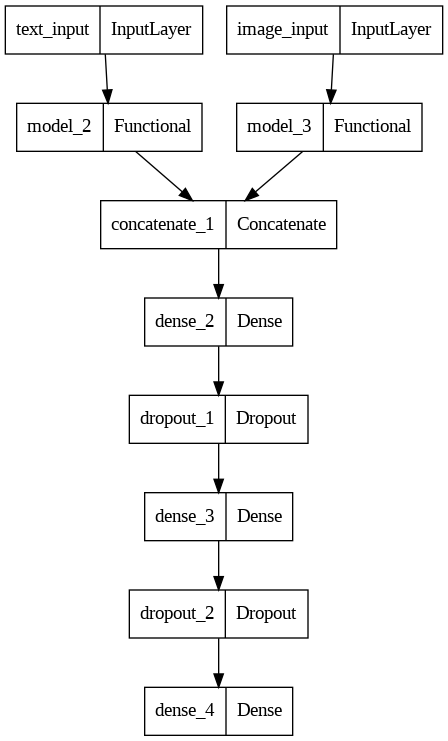

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(fusion_model, to_file='multimodal.png')

In [ ]:
history = fusion_model.fit(
    [X_train_text, X_train_image],  # Pass both text and image inputs
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1  # Split some data for validation
)


Epoch 1/10
1911/1911 [==============================] - 102s 46ms/step - loss: 1.0400 - accuracy: 0.7191 - val_loss: 0.6238 - val_accuracy: 0.8109
Epoch 2/10
1911/1911 [==============================] - 93s 49ms/step - loss: 0.7468 - accuracy: 0.7948 - val_loss: 0.6725 - val_accuracy: 0.8057
Epoch 3/10
1911/1911 [==============================] - 94s 49ms/step - loss: 0.7119 - accuracy: 0.8029 - val_loss: 0.6765 - val_accuracy: 0.8103
Epoch 4/10
1911/1911 [==============================] - 93s 49ms/step - loss: 0.6761 - accuracy: 0.8120 - val_loss: 0.6787 - val_accuracy: 0.8082
Epoch 5/10
1911/1911 [==============================] - 94s 49ms/step - loss: 0.6471 - accuracy: 0.8195 - val_loss: 0.7086 - val_accuracy: 0.8050
Epoch 6/10
1911/1911 [==============================] - 91s 47ms/step - loss: 0.6358 - accuracy: 0.8240 - val_loss: 0.7049 - val_accuracy: 0.8066
Epoch 7/10
1911/1911 [==============================] - 95s 49ms/step - loss: 0.6222 - accuracy: 0.8277 - val_loss: 0.7615 

In [ ]:
# save the model fusion model:
fusion_model.save('best_fusion_model_2.0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


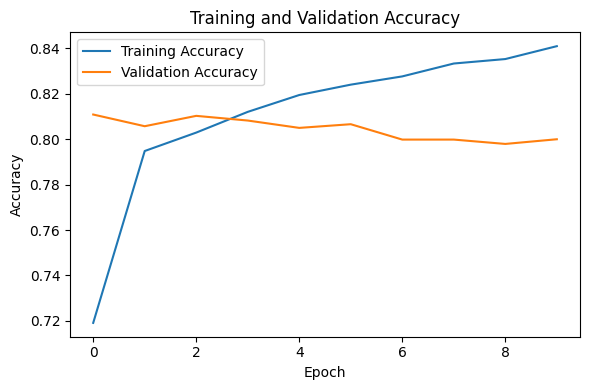

In [ ]:

# Extract training history :
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training accuracy and validation accuracy :
plt.figure(figsize=(6, 4))

# Plot training accuracy :
plt.plot(train_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot validation accuracy :
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

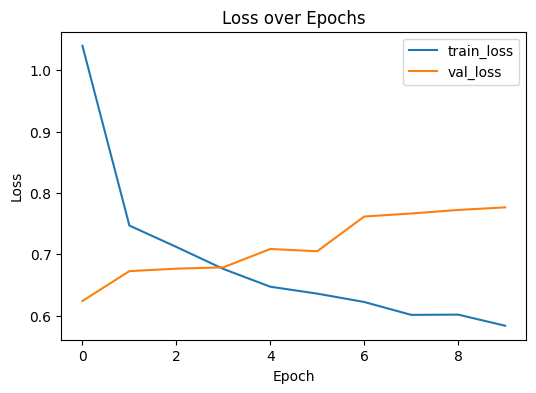

In [ ]:
plt.figure(figsize=(6, 4))
# plot the trainng loss:
plt.plot(history.history['loss'], label='train_loss')

# plot validation loss :
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()